In [6]:
import pandas as pd
TelcoData = pd.read_csv("/content/archive (5).zip")
TelcoData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
TelcoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
TelcoData['TotalCharges'] = pd.to_numeric(TelcoData['TotalCharges'], errors='coerce')

# Check for missing values
TelcoData.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
TelcoData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Handling Missing Values in TotalCharges:
Since TotalCharges only has 11 missing values, it’s reasonable to replace them rather than drop the rows. Given the distribution, the median seems like a good choice, especially since TotalCharges has a high standard deviation (2,266) and a wide range. This high variability suggests some customers have very low TotalCharges (likely new customers with short tenures), while others have high cumulative charges over a longer tenure.



In [11]:
# Replace missing values in 'TotalCharges' with the median
TelcoData['TotalCharges'].fillna(TelcoData['TotalCharges'].median(), inplace=True)


<ipython-input-11-8eba623433bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TelcoData['TotalCharges'].fillna(TelcoData['TotalCharges'].median(), inplace=True)


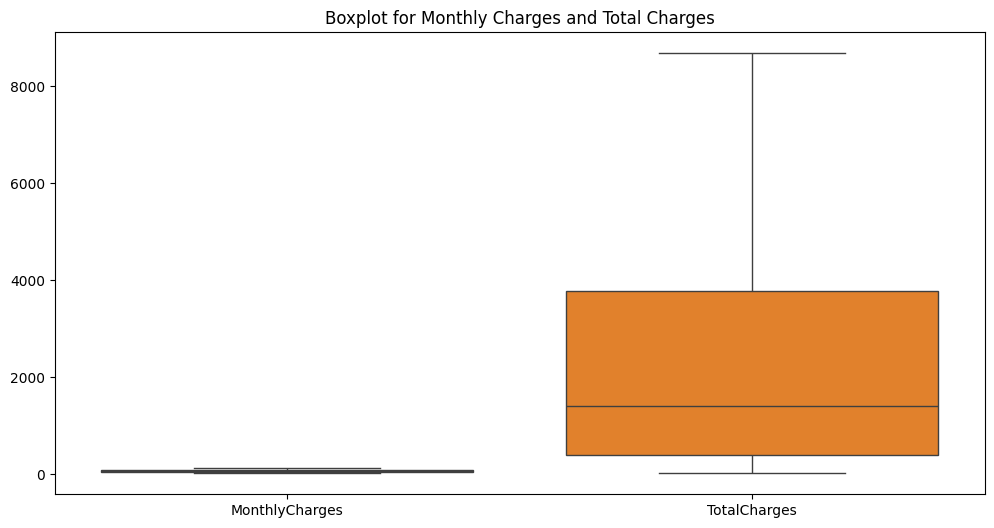

In [13]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(12, 6))
sns.boxplot(data=TelcoData[['MonthlyCharges', 'TotalCharges']])
plt.title('Boxplot for Monthly Charges and Total Charges')
plt.show()


# Churn Distribution
understanding the distribution to see if there is any class imbalance

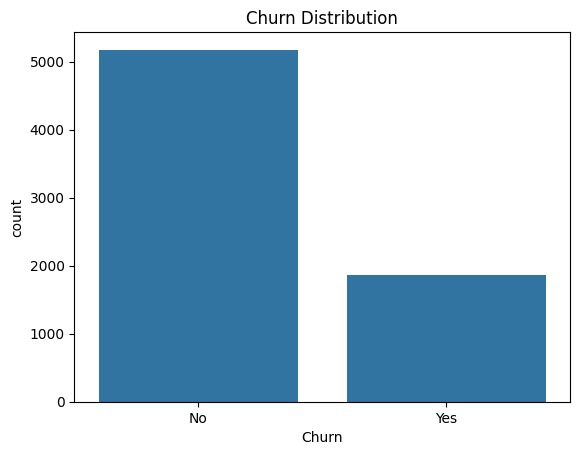

In [14]:
# Plot churn distribution
sns.countplot(data=TelcoData, x='Churn')
plt.title('Churn Distribution')
plt.show()


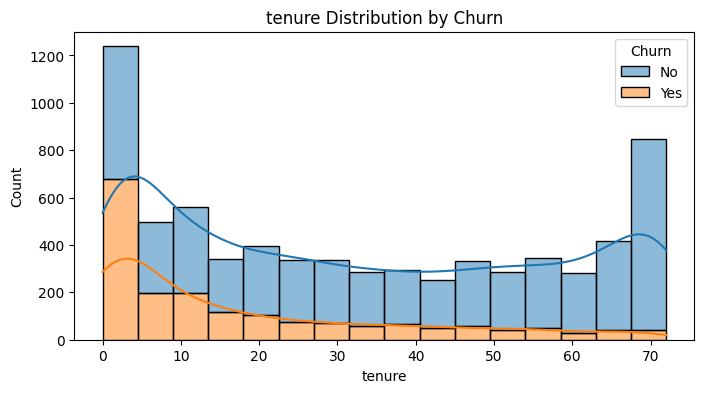

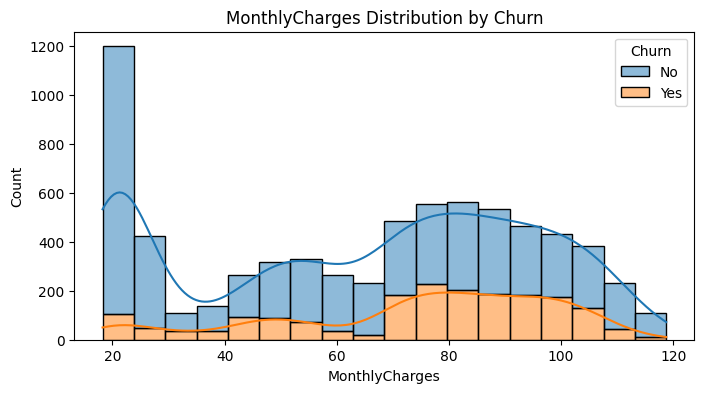

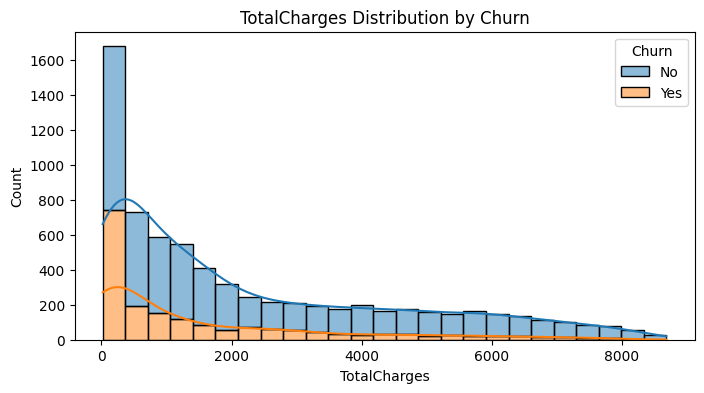

In [15]:
# Plot distribution of tenure, MonthlyCharges, and TotalCharges by churn
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=TelcoData, x=col, hue='Churn', kde=True, multiple="stack")
    plt.title(f'{col} Distribution by Churn')
    plt.show()



# Tenure and Churn
The tenure distribution shows a clear pattern: customers with lower tenure (i.e., new customers) have a significantly higher churn rate. This suggests that retention strategies might be particularly beneficial for newer customers.
# TotalCharges Distribution
We can see that customers with lower TotalCharges have a higher churn rate (orange bars) compared to those with higher TotalCharges.
This trend suggests that newer customers or those with fewer total charges are more likely to churn.
# MonthlyCharges Distribution
The MonthlyCharges distribution shows a slightly higher churn rate among customers with higher monthly charges.
This trend indicates that customers paying more monthly may be more likely to leave, possibly due to dissatisfaction with high costs.

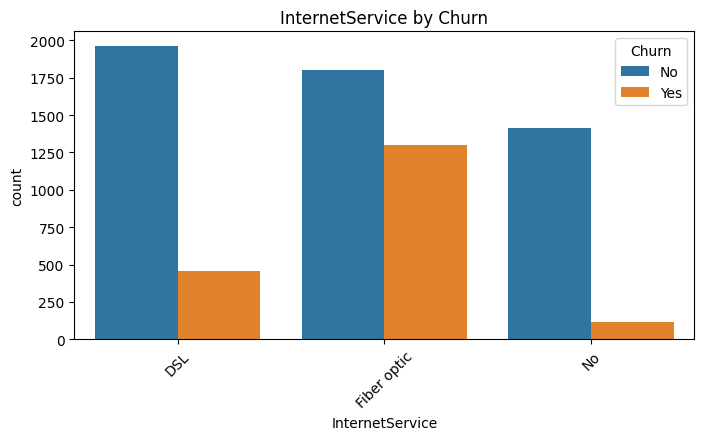

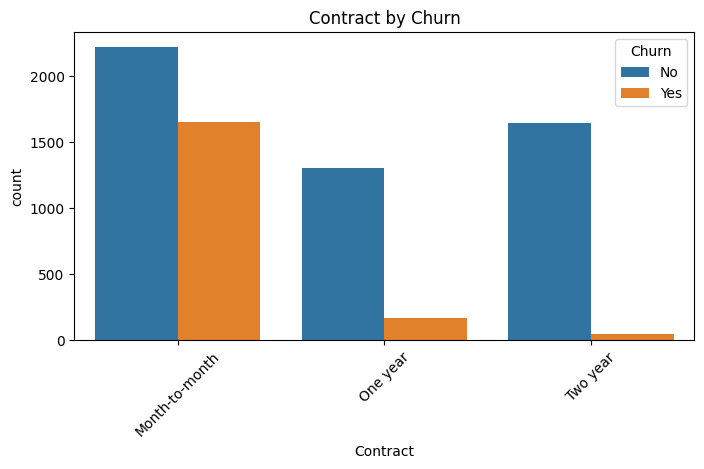

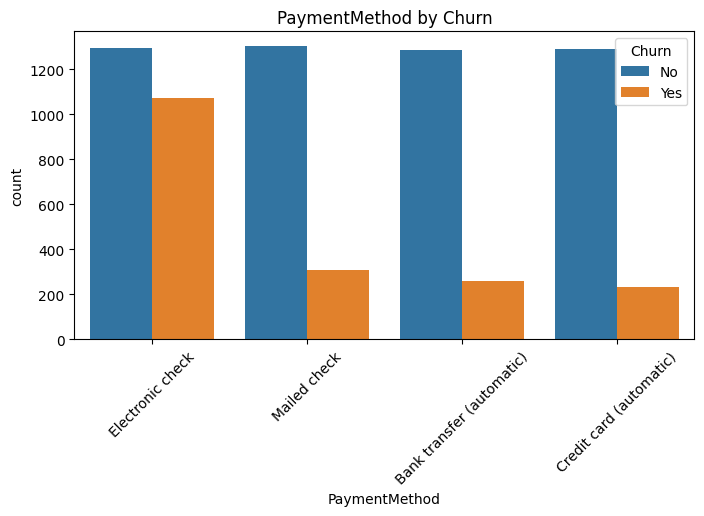

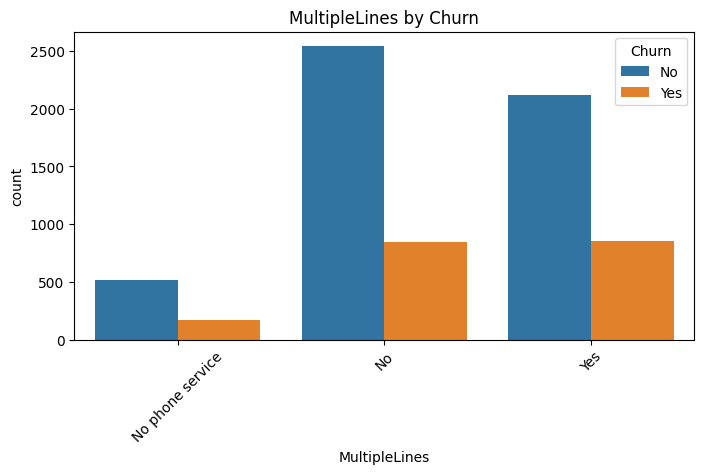

In [17]:
# Plot distribution of categorical features by churn
categorical_features = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=TelcoData, x=col, hue='Churn')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45)
    plt.show()



# Internet Service

Customers with fiber optic internet have significantly higher churn compared to those with DSL or no internet service. This might indicate potential dissatisfaction with fiber optic service (perhaps due to cost or service reliability).
Customers with no internet service have low churn, which could mean these customers are likely using minimal services, leading to fewer reasons to leave.
# Contract Type

Customers on month-to-month contracts have the highest churn. This makes sense, as these customers are not bound by long-term agreements and can easily switch to competitors.
Churn is minimal for one-year and two-year contracts, indicating that long-term contracts help in retaining customers, possibly due to stability or incentives.
# Payment Method

Customers who use electronic checks have the highest churn. This may be related to demographic or preference factors that correlate with higher churn, such as customers who might be less familiar with or have less trust in online transactions.
Mailed checks, bank transfers, and credit cards have lower churn, suggesting that these payment methods could correlate with customers who have a stronger commitment or preference for stable, automatic payments.
# Multiple Lines

Churn rates for having multiple lines are fairly balanced between customers with or without multiple lines, indicating that this factor alone may not be a strong churn predictor.
However, the very low churn among those with no service on multiple lines might suggest these are customers who subscribe to a single service and are satisfied with that minimal setup.

# Tenure group analysis
A bar plot or stacked bar chart depicting churn counts across different tenure groups showed the most significant churn in the 0-12 month range, indicating that newer customers are at higher risk of leaving.

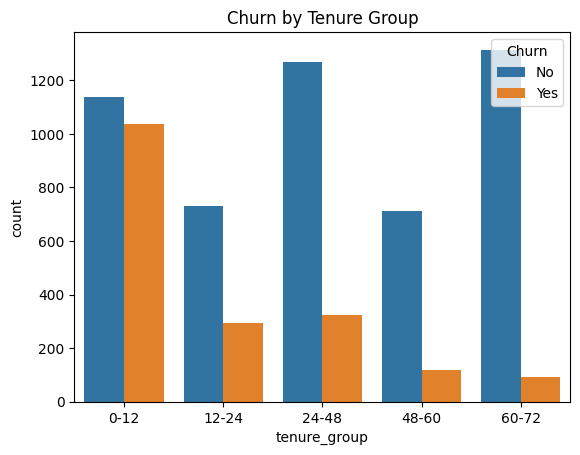

In [20]:
# Create tenure groups
TelcoData['tenure_group'] = pd.cut(TelcoData['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

# Plot churn by tenure group
sns.countplot(data=TelcoData, x='tenure_group', hue='Churn')
plt.title('Churn by Tenure Group')
plt.show()


# Influential features finding with logistic regression

In [23]:
TelcoData.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'tenure_group_12-24', 'tenure_group_24-48',
       'tenure_group_48-60', 'tenure_group_60-72'],
      dtype='object', length=7077)

              precision    recall  f1-score   support

       False       0.80      0.96      0.87      1036
        True       0.74      0.35      0.47       373

    accuracy                           0.79      1409
   macro avg       0.77      0.65      0.67      1409
weighted avg       0.79      0.79      0.77      1409



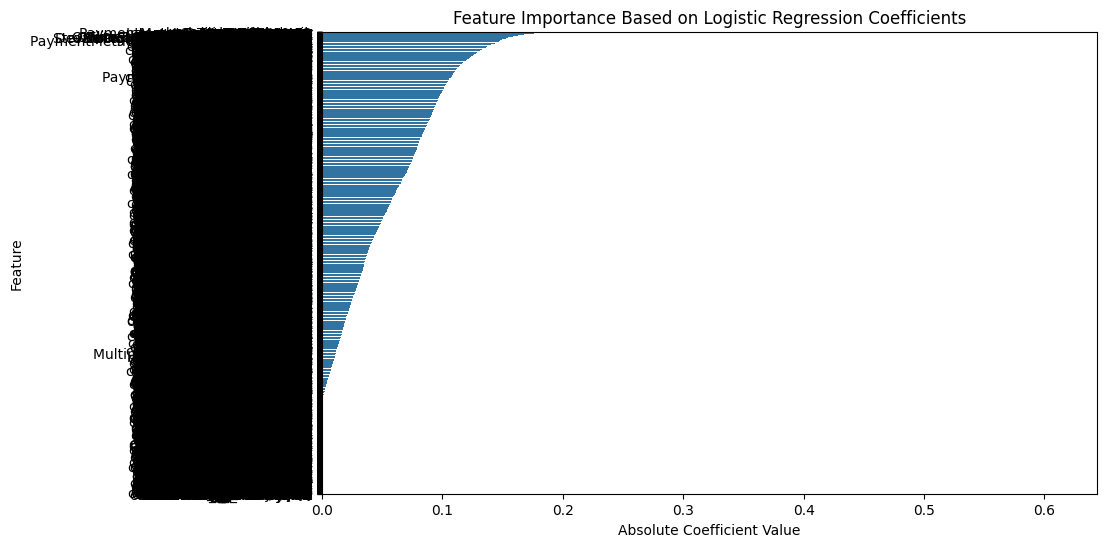

                             Feature  Coefficient  Abs_Coefficient
1                             tenure    -0.613030         0.613030
7052     InternetService_Fiber optic     0.537301         0.537301
7067               Contract_Two year    -0.439203         0.439203
7070  PaymentMethod_Electronic check     0.427689         0.427689
3                       TotalCharges    -0.424434         0.424434


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# Preprocess: Encode categorical variables and handle missing data
TelcoData = pd.get_dummies(TelcoData, drop_first=True)  # Convert categorical variables to dummies
TelcoData = TelcoData.dropna()  # Drop rows with missing values (or handle them accordingly)

# Define the target variable and features
X = TelcoData.drop('Churn_Yes', axis=1)  # Drop the target variable 'Churn'
y = TelcoData['Churn_Yes']  # Churn is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Get the coefficients of the features
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by the absolute value of coefficients to find influential features
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Display the most influential features
print(coefficients.head())


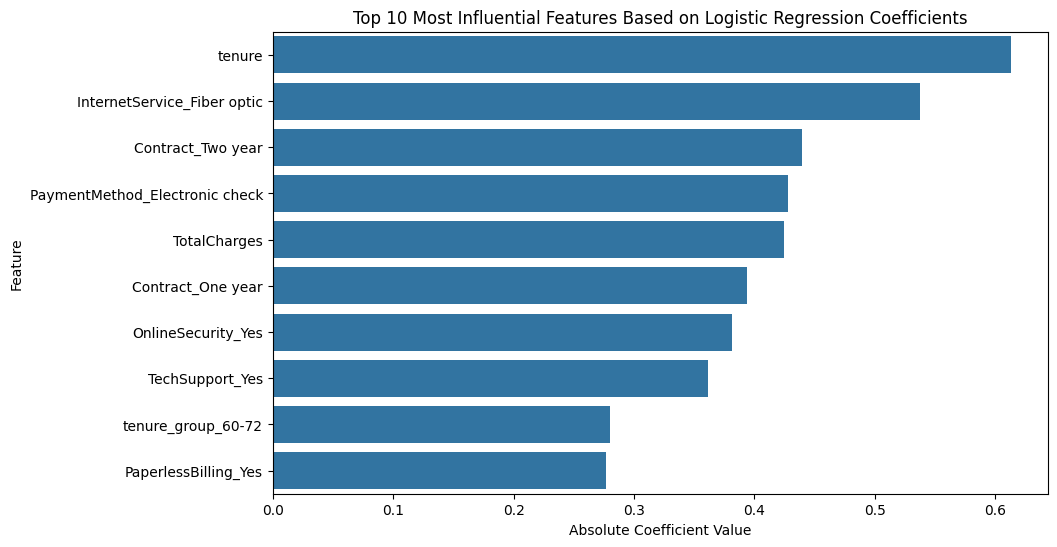

In [25]:
# Sort the coefficients by absolute value and focus on the top 10 features
top_coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_coefficients)
plt.title('Top 10 Most Influential Features Based on Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()


# Key Influential Factors
The analysis of key features influencing churn reveals several important patterns. Tenure has the strongest negative influence on churn, with longer tenures correlating with lower churn rates. Conversely, Internet Service (Fiber optic), Payment Method (Electronic check), Online Security (Yes), and Tech Support (Yes) are positively associated with churn, suggesting that customers using these services may be less satisfied or more likely to leave. Contract types also play a significant role, with customers on two-year contracts and one-year contracts less likely to churn, indicating that longer commitments improve retention. Total Charges shows a negative correlation with churn, suggesting that higher spending is linked to greater retention, while Tenure Group 60-72 months also shows reduced churn. Interestingly, Paperless Billing is associated with higher churn, potentially indicating a preference for more transient customers.

# Conclusion from EDA
Tenure is the most influential factor in churn prediction. Newer customers are at a higher risk of churn, suggesting that customer retention strategies should focus on this group.
Contract type plays a significant role in reducing churn. Offering longer contracts (especially 2-year contracts) could be an effective retention strategy.
Service Features (Online Security, Tech Support): Customers who have opted for these services are more likely to churn, suggesting potential dissatisfaction with the quality or expectations set by these services.
Payment Method: Electronic check users tend to churn more, which could point to payment issues or dissatisfaction with the billing process.

# Recommendations based on findings
Targeting New Customers: Since customers with shorter tenure (0-12 months) are more likely to churn, it's crucial to design loyalty programs or early retention campaigns.
Promote Long-Term Contracts: Encourage customers to opt for two-year contracts, which show a lower churn rate.
Improve Customer Experience with Service Features: Investigate and improve online security and tech support services to better retain customers.
Payment Method Analysis: Investigate customers using Electronic Check for payment and explore potential issues like failed payments, service dissatisfaction, or miscommunication around payment methods.
Further Investigation of Churn Causes: It may be beneficial to collect additional customer satisfaction data or usage patterns to further refine churn predictions.